# Support vector machine

The theory and name always sounds fairy. Like from wiki:

From wiki:
> In machine learning, support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.

That sounds really fancy! But if I give you an example, you'd understand at a glimpse.

See this:
<img src="./image/svc_1.png" width="400"/>

In general, in a plot of height and weight, you can classify it with a line in between. That will seperate male and female.

The support vector machine is used to do that based on different attributes and scenario. Even though not all tall and more weight are male, you still can get a general line in between. When you seperate based on more attributes, the data will not be easily seperated by a straight line. Therefore, there are several kernal to classify data. 

This notebook will demonstrate the easy understand kernal, linear. That is also easier to understand SVC.

I have a csv that list the
- download speed
- upload speed
- latency

I'd like to use SVC to draw a line between high performance and low performance internet speed accross Europe.

I take download speed as the top priority between the 3.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_excel('../data/Average Internet Speeds Across Europe.xlsx').dropna()

download_speed = df['average download speed'].to_numpy()
upload_speed = df['average upload speed'].to_numpy()
latency = df['average latency'].to_numpy()

In [2]:
def convert_to_2d_array(darray1, darray2):
    X = []
    for i in range(len(darray1)):
        X.append([darray1[i], darray2[i]])
    X = np.array(X)
    return X

X = convert_to_2d_array(download_speed, latency)

I created 3 labels based.
1. Download speed faster than mean, and download speed is faster than upload speed
2. Download speed faster than mean
3. Download speed slowing than mean

In [3]:
# speed >= mean
# download_speed / upload_speed: ratio > 1
def label_on_downloadSpeed(download_speed, upload_speed):
    label = []
    download_speed_mean = np.mean(download_speed)
    
    for index in range(len(download_speed)):
        
        if download_speed[index] >= download_speed_mean:    
            quotient = download_speed[index] / upload_speed[index]

            if quotient >= 1:
                label.append(2)
            else:
                label.append(1)
                
        else:
            label.append(0)
            
    label = np.array(label)
    return label

y = label_on_downloadSpeed(download_speed, upload_speed)

Let's plot the data. The yellow dot represents the label 2. It means the high download speed and download/upload ratio > 1.

While the green dot represents the high download speed, but upload speed is faster than download.

The dark dot means the download speed is less than mean.

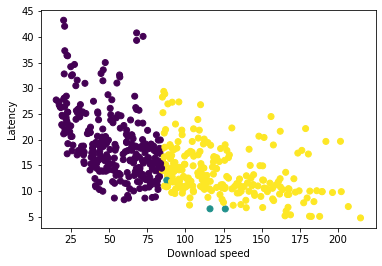

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Download speed')
plt.ylabel('Latency')
plt.show()

Let's create a classifier to seperate this 3 labels.

I split the data and use that to scatter in the graph again. The train data is **dot**, while test data is **square**.

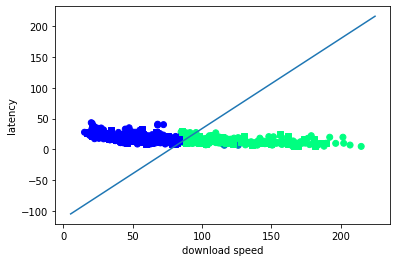

In [5]:
from sklearn import svm
from sklearn.model_selection import train_test_split

def train_and_plot(X, y):
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

    svc = svm.SVC(kernel='linear', C=1.0)
    svc.fit(train_X, train_y)

    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap='winter')
    plt.xlabel('download speed')
    plt.ylabel('latency')

    # get the axis
    ax = plt.gca()
    
    # get the x limit of the plot
    xlim = ax.get_xlim()

    # plot the test data
    ax.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap='winter', marker='s')
    
    # this is the weight of the classifier
    # we need this to draw the line!
    # e.g. y = ax + b, this is what we need to draw the line
    w = svc.coef_[0]  # coefficient
    a = -w[0] / w[1]
    xx = np.linspace(xlim[0], xlim[1])
    yy = a * xx - (svc.intercept_[0] / w[1])
    plt.plot(xx, yy)
    plt.show()
    
train_and_plot(X, y)

Because we want the classifier to seperate 3 labels, it ends up like this.

Let's remove 1 label and train classifier again.

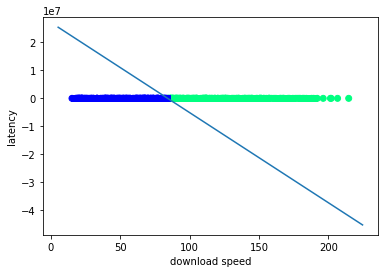

In [6]:
def label_on_downloadSpeed_2_label_only(download_speed, upload_speed):
    label = []
    download_speed_mean = np.mean(download_speed)
    
    for index in range(len(download_speed)):
        
        if download_speed[index] >= download_speed_mean:    
            label.append(1)              
        else:
            label.append(0)
            
    label = np.array(label)
    return label

y = label_on_downloadSpeed_2_label_only(download_speed, upload_speed)

train_and_plot(X, y)

This is better now. It attempted its best to seperate 2 labels. 

It's not vertical line because I did not plot it based on *latency and download speed*. I label the data based on the download speed and upload speed ratio.